In [106]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

In [107]:
def undistort_dohko(imagem):
    mtx = np.array([[772.07218515,0.,634.15206573],[0.,771.9959048,366.5862172],[0.,0.,1.]])
    dist = np.array([[0.09361794,-0.22823167,0.00027023,-0.00095334,0.09892737]])
    
    S = np.float32([[ 3.86626825, -7.10264597e+01,  1.29863410e+02],
       [-1.45832507e+02, -3.83402794,  1.8235959],
       [ 3.22595808e-03,  1.25526699,  1.]])
    
    mtx2 = np.float32([[4,  0,     0],
                   [0, -4, 4*105],
                   [0,  0,     1]])
    dim = (4*297, 4*210)
    tipo_mapa = cv2.CV_32FC1
    mapa_x, mapa_y = cv2.initUndistortRectifyMap(mtx, dist, S, mtx2, dim, tipo_mapa)
    borda = cv2.BORDER_REPLICATE

    return cv2.remap(imagem, mapa_x, mapa_y, cv2.INTER_LINEAR, borderMode=borda)

In [108]:
captura_triangulo = "triangulo.jpg"

In [109]:
imagem = cv2.imread(captura_triangulo)
imagem = undistort_dohko(imagem)
imagem_gray = cv2.cvtColor(imagem, cv2.COLOR_BGR2GRAY)
imagem_gray = np.array(imagem_gray, dtype=np.float32)

In [110]:
imagem_gray

array([[ 98.,  98.,  98., ..., 117., 117., 117.],
       [ 98.,  98.,  98., ..., 117., 117., 117.],
       [ 98.,  98.,  98., ..., 117., 117., 117.],
       ...,
       [ 81.,  81.,  81., ..., 140., 138., 136.],
       [ 81.,  81.,  81., ..., 141., 139., 137.],
       [ 81.,  81.,  81., ..., 141., 139., 137.]], dtype=float32)

In [111]:
r_0 = cv2.cornerHarris(imagem_gray, 7, 3, 0.015)

In [112]:
r_0.max()

774011.4

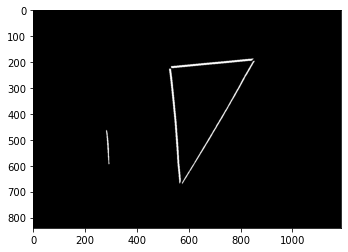

In [113]:
plt.imshow(r_0<-4000,  cmap='gray')

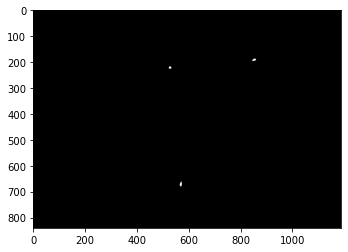

In [114]:
plt.imshow(r_0>4000, cmap='gray')

In [115]:
cantos = cv2.goodFeaturesToTrack(imagem_gray, 3, 0.01, 10)
cantos = cantos.reshape((len(cantos), 2))

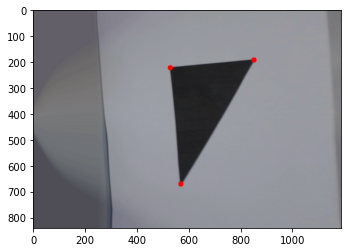

In [116]:
for n in cantos:
    cv2.circle(imagem, tuple(n.astype('int')), 10, (255,0,0), -1)
plt.imshow(imagem)

In [117]:
matcher = cv2.BFMatcher(normType=cv2.NORM_L2, crossCheck=False)
captura_triangulo_2 = "triangulo2.jpg"
imagem_2 = cv2.imread(captura_triangulo_2)
imagem_2 = undistort_dohko(imagem_2)
imagem_gray_2 = cv2.cvtColor(imagem_2, cv2.COLOR_BGR2GRAY)
imagem_gray_2 = np.array(imagem_gray_2, dtype=np.float32)
cantos_2 = cv2.goodFeaturesToTrack(imagem_gray_2, 3, 0.01, 10)
cantos_2 = cantos_2.reshape((len(cantos_2), 2))
matches = matcher.match(cantos_2, cantos)
kp1 = np.array([cv2.KeyPoint(*x, 3) for x in cantos])
kp2 = np.array([cv2.KeyPoint(*x, 3) for x in cantos_2])

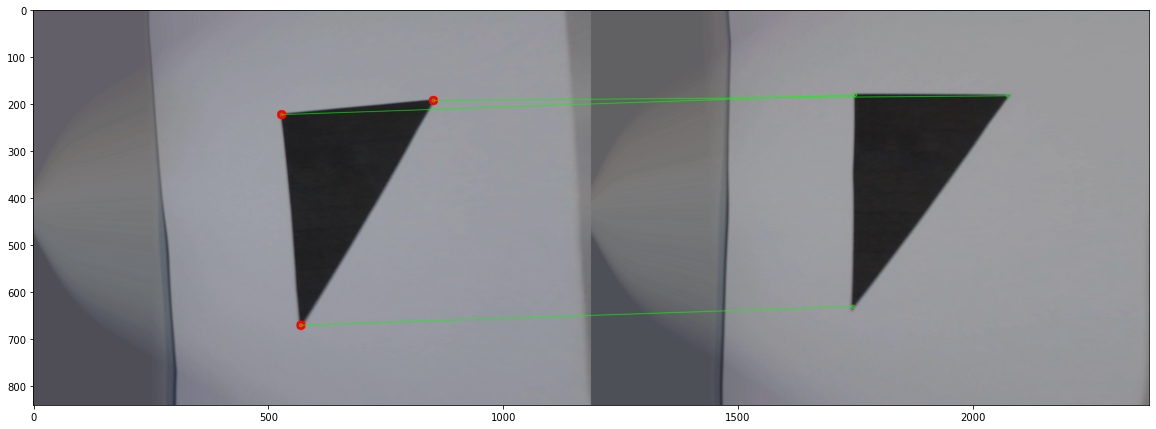

In [118]:
imagem_match = cv2.drawMatches(imagem,kp1,imagem_2,kp2,matches,None,matchColor=(0,255,0))

plt.figure(figsize = (20,20))
plt.imshow(imagem_match)

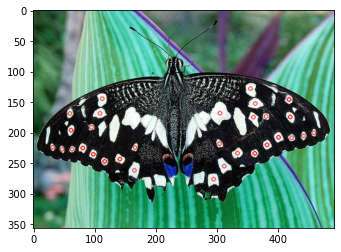

In [119]:
borboleta = cv2.imread("borboleta.jpg")

surf = cv2.xfeatures2d.SURF_create(60000)
kp1, desc1 = surf.detectAndCompute(borboleta, None)
nova_borboleta = cv2.drawKeypoints(borboleta, kp1, borboleta, (255,0,0), cv2.DRAW_MATCHES_FLAGS_DRAW_OVER_OUTIMG)
plt.imshow(nova_borboleta)

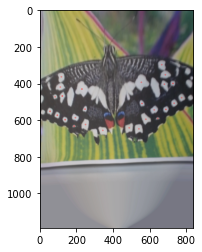

In [131]:
brabuleta = undistort_dohko(cv2.imread("brabuleta.jpg"))
brabuleta = cv2.rotate(brabuleta, cv2.ROTATE_90_COUNTERCLOCKWISE)

surf.setHessianThreshold(15000)
kp2, desc2 = surf.detectAndCompute(brabuleta, None)
nova_brabuleta = cv2.drawKeypoints(brabuleta, kp2, brabuleta, (255,0,0), cv2.DRAW_MATCHES_FLAGS_DRAW_OVER_OUTIMG)
plt.imshow(nova_brabuleta)

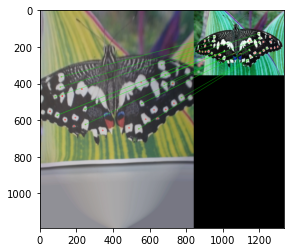

In [132]:
matches = matcher.knnMatch(desc2, desc1, k=2)
matchesMask = [[0 ,0] for i in range(len(matches))]
for i, (m, n) in enumerate(matches):
    if m.distance < 0.7*n.distance:
        matchesMask[i]=[1 ,0]
draw_params = dict(matchColor=(0,255,0),
                singlePointColor=(255,0,0),
                matchesMask=matchesMask,
                flags=cv2.DrawMatchesFlags_DEFAULT)
imagem = cv2.drawMatchesKnn(brabuleta, kp2, borboleta, kp1, matches, None ,**draw_params)
plt.imshow(imagem)

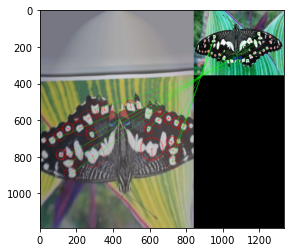

In [135]:
brabuleta = undistort_dohko(cv2.imread("brabuleta.jpg"))

brabuleta = cv2.rotate(brabuleta, cv2.ROTATE_90_COUNTERCLOCKWISE)
brabuleta = cv2.rotate(brabuleta, cv2.ROTATE_180)
kp2, desc2 = surf.detectAndCompute(brabuleta, None)
nova_brabuleta = cv2.drawKeypoints(brabuleta, kp2, brabuleta, (255,0,0), flags=5)
plt.imshow(nova_brabuleta)

matches = matcher.knnMatch(desc2, desc1, k=2)
matchesMask = [[0 ,0] for i in range(len(matches))]
for i, (m, n) in enumerate(matches):
    if m.distance < 0.7*n.distance:
        matchesMask[i]=[1 ,0]
draw_params = dict(matchColor=(0,255,0),
                singlePointColor=(255,0,0),
                matchesMask=matchesMask,
                flags=cv2.DrawMatchesFlags_DEFAULT)
imagem = cv2.drawMatchesKnn(brabuleta, kp2, borboleta, kp1, matches, None ,**draw_params)
plt.imshow(imagem)

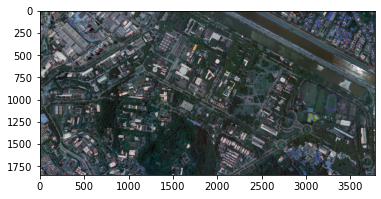

In [136]:
ciduniv = cv2.imread("ciduniv.png")

surf = cv2.xfeatures2d.SURF_create(10000)
kp_uni, desc_uni = surf.detectAndCompute(ciduniv, None)
nova_ciduniv = cv2.drawKeypoints(ciduniv, kp_uni, ciduniv, (255,0,0), cv2.DRAW_MATCHES_FLAGS_DRAW_OVER_OUTIMG)
plt.imshow(ciduniv)

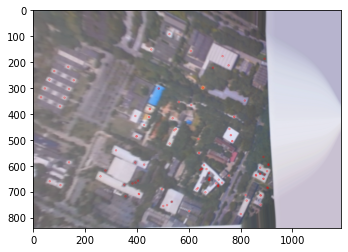

In [147]:
poli_satelite = undistort_dohko(cv2.imread("poli_satelite.jpg"))
poli_satelite = cv2.rotate(poli_satelite, cv2.ROTATE_180)

surf = cv2.xfeatures2d.SURF_create(4000)
kp_poli, desc_poli = surf.detectAndCompute(poli_satelite, None)
nova_ciduniv = cv2.drawKeypoints(poli_satelite, kp_poli, poli_satelite, (255,0,0), cv2.DRAW_MATCHES_FLAGS_DRAW_OVER_OUTIMG)
plt.imshow(poli_satelite)

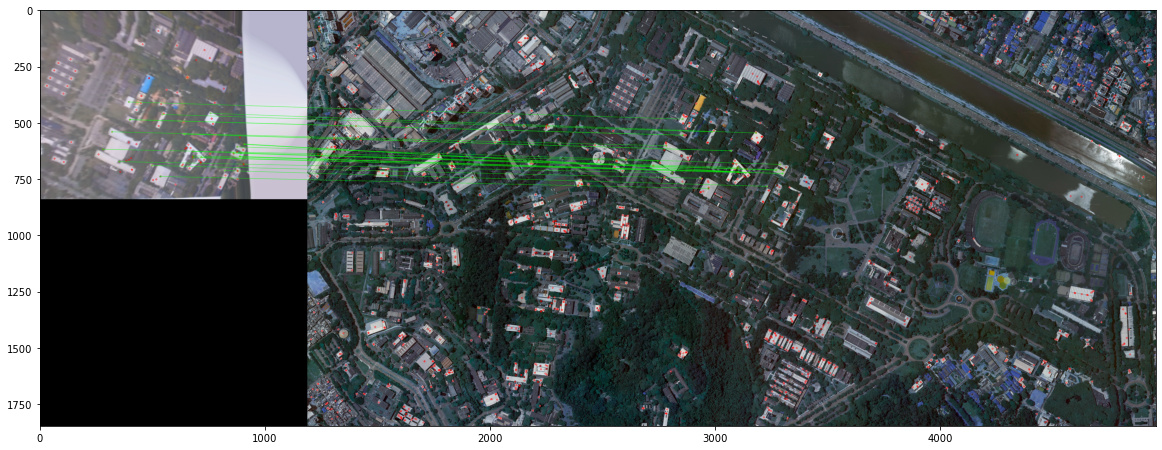

In [148]:
FLANN_INDEX_KDTREE = 1
index_params = dict(algorithm=FLANN_INDEX_KDTREE, trees=4)
search_params = dict(checks =50)
flann = cv2.FlannBasedMatcher(index_params, search_params)
flann.add(np.array([desc_uni]))
flann.train()
matches = flann.knnMatch(desc_poli,k=2)

matchesMask = [[0 ,0] for i in range(len(matches))]
for i, (m, n) in enumerate(matches):
    if m.distance < 0.7*n.distance:
        matchesMask[i]=[1 ,0]
draw_params = dict(matchColor=(0,255,0),
                singlePointColor=(255,0,0),
                matchesMask=matchesMask,
                flags=cv2.DrawMatchesFlags_DEFAULT)
imagem = cv2.drawMatchesKnn(poli_satelite, kp_poli, ciduniv, kp_uni, matches, None ,**draw_params)

plt.figure(figsize = (20,20))
plt.imshow(imagem)

In [149]:
pt1 = np.array([kp_poli[matches[i][0].queryIdx].pt for i in range(len(matches))])
pt2 = np.array([kp_uni[matches[i][1].trainIdx].pt for i in range(len(matches))])

matriz, mascara = cv2.estimateAffinePartial2D(pt1, pt2)